In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [13]:
df_dk = pd.read_csv(f'{data.data_root}/processed/denmark_ihme.csv')
df_de = pd.read_csv(f'{data.data_root}/processed/germany_ihme.csv')

df_dk['date'] = pd.to_datetime(df_dk['date'])
df_de['date'] = pd.to_datetime(df_de['date'])

In [14]:
def cumulative_cases(df, population):
    df['inf_mean_cumulative'] = df.inf_mean.cumsum()
    df['inf_lower_cumulative'] = df.inf_lower.cumsum()
    df['inf_upper_cumulative'] = df.inf_upper.cumsum()
    
    df['S_mean'] = (population - df['inf_mean_cumulative']) / population
    df['S_lower'] = (population - df['inf_lower_cumulative']) / population
    df['S_upper'] = (population - df['inf_upper_cumulative']) / population
    
    df['S'] = (population - df.cumulative_cases) / population

    return df

df_dk = cumulative_cases(df_dk, population=5.84e6)
df_de = cumulative_cases(df_de, population=83.9e6)

In [15]:
import datetime

In [16]:
start_date=datetime.date(2020, 2, 15)
end_date=datetime.date(2021,5,10)

def chop_time(df):    
    return df[ (df.date.dt.date>=start_date)&(df.date.dt.date<=end_date) ]

df_dk = chop_time(df_dk)
df_de = chop_time(df_de)

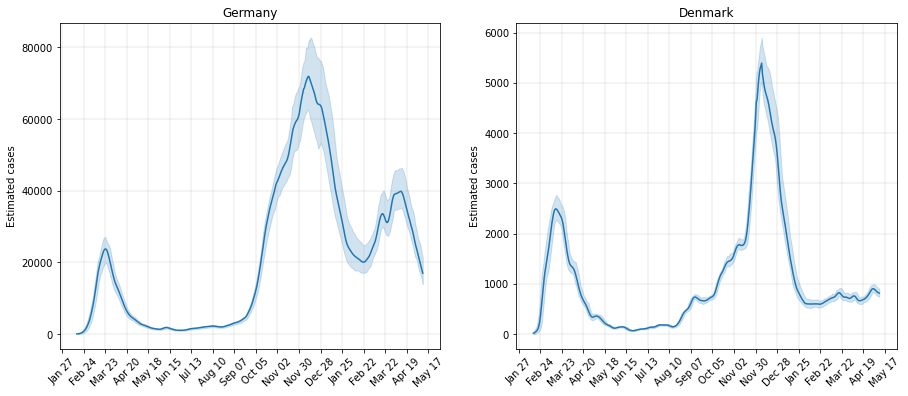

In [17]:
fig, axs = plt.subplots(ncols=2)

for ax, (country, df) in zip(axs, {'germany':df_de, 'denmark': df_dk}.items()):     
    ax = sns.lineplot(data=df, x='date', y='inf_mean', ax=ax)
    ax.fill_between(
            df.date,
            df['inf_lower'],
            df['inf_upper'],
            color=sns.color_palette()[0],
            alpha=0.2
    )
    #ax.set_xlim(left=start_date, right=end_date)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel('')
    ax.grid(color='#999999', linewidth=0.2)
    ax.set_title(f'{country.capitalize()}')
    ax.set_ylabel('Estimated cases')

<AxesSubplot:xlabel='date', ylabel='daily_cases'>

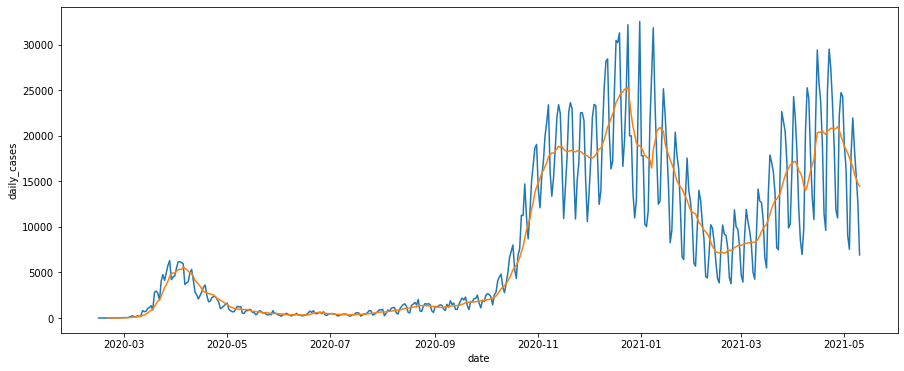

In [18]:
sns.lineplot(data=df_de, x='date', y='daily_cases')
sns.lineplot(data=df_de.set_index('date').daily_cases.rolling(7).mean())

In [19]:
df_de.inf_mean.sum(),df_de.daily_cases.sum(), df_de.cumulative_cases.iloc[-1]

(9669895.209999999, 3527237.0199999996, 3527251.0)

In [20]:
from matplotlib.lines import Line2D

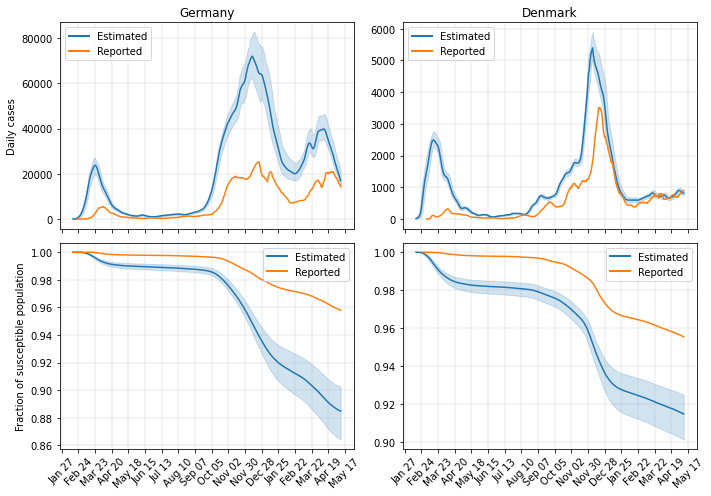

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,7), sharex=True)
legend_items = [Line2D([0], [0], color=sns.color_palette()[i], lw=2) for i in range(2)]

for ax, (country, df) in zip(axs[0,:], {'germany':df_de, 'denmark': df_dk}.items()):     
    sns.lineplot(data=df, x='date', y='inf_mean', ax=ax)
    ax.fill_between(
            df.date,
            df['inf_lower'],
            df['inf_upper'],
            color=sns.color_palette()[0],
            alpha=0.2
    )

    sns.lineplot(data=df.set_index('date').daily_cases.rolling(7).mean(), ax=ax, )
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel('')
    ax.grid(color='#999999', linewidth=0.2)
    ax.set_title(f'{country.capitalize()}')
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Daily cases')
    else:
        ax.set_ylabel('')
    ax.legend(loc='upper left', handles=legend_items, labels=['Estimated', 'Reported'])

for ax, (country, df) in zip(axs[1,:], {'germany':df_de, 'denmark': df_dk}.items()):     
    sns.lineplot(data=df, x='date', y='S_mean', ax=ax)
    ax.fill_between(
            df.date,
            df['S_lower'],
            df['S_upper'],
            color=sns.color_palette()[0],
            alpha=0.2
    )
    sns.lineplot(data=df, x='date', y='S', ax=ax)


    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel('')
    ax.grid(color='#999999', linewidth=0.2)
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Fraction of susceptible population')
    else:
        ax.set_ylabel('')
    ax.legend(loc='upper right', handles=legend_items, labels=['Estimated', 'Reported'])
    
# for ax, (country, df) in zip(axs[1,:], {'germany':df_de, 'denmark': df_dk}.items()):     
#     sns.lineplot(data=df, x='date', y='inf_mean_cumulative', ax=ax)
#     ax.fill_between(
#             df.date,
#             df['inf_lower_cumulative'],
#             df['inf_upper_cumulative'],
#             color=sns.color_palette()[0],
#             alpha=0.2
#     )
#     sns.lineplot(data=df, x='date', y='cumulative_cases', ax=ax)


#     ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#     ax.xaxis.set_tick_params(rotation=45)
#     ax.set_xlabel('')
#     ax.grid(color='#999999', linewidth=0.2)
#     ax.set_title(f'{country.capitalize()}')
#     ax.set_ylabel('Cumulative cases')
#     ax.legend(loc='upper left', labels=['Estimated', 'Reported'])
fig.tight_layout()

#fig.savefig('figS5.pdf', format='pdf', bbox_inches='tight')

There are no $R_{eff}$ data for Germany.

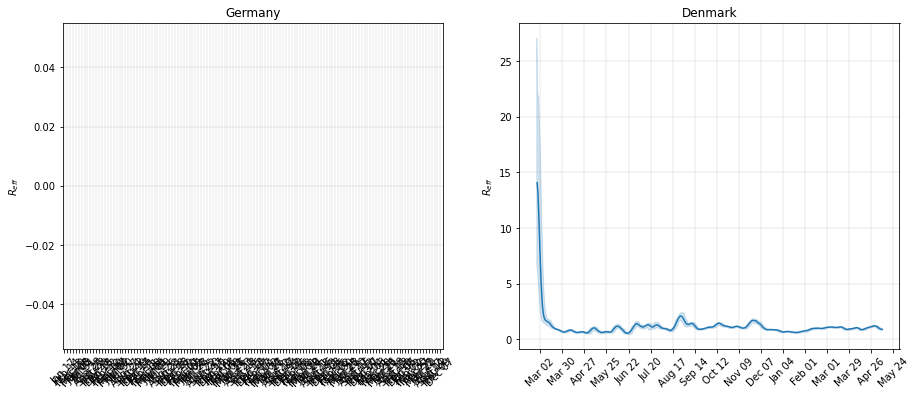

In [22]:
fig, axs = plt.subplots(ncols=2)
    
for ax, (country, df) in zip(axs, {'germany':df_de, 'denmark': df_dk}.items()):     
    ax = sns.lineplot(data=df, x='date', y='reff_mean', ax=ax)
    ax.fill_between(
            df.date,
            df['reff_lower'],
            df['reff_upper'],
            color=sns.color_palette()[0],
            alpha=0.2
    )

    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel('')
    ax.grid(color='#999999', linewidth=0.2)
    ax.set_title(f'{country.capitalize()}')
    ax.set_ylabel(r'$R_{eff}$')